# Yield to Maturity for Debt Instruments:

A debt instrument is a contract that entitles the buyer/lender/invester to a steady stream of payments from the seller/borrower/issuer for a certain period of time, as well as a lumpsum payment at the end.

Definitions: 
- $y$ is the yeild-to-maturity (y2m) or "effective avg interest rate" for that instrument.
- $P$ is the current value or current price.
- $F$ is the face value or par or "principal" or price at maturity guarenteed by issuer.
- $n$ is the term / maturity period (in years).
- $c$ is the coupon rate (the fraction of $F$ that will be paid as interest, annually).

The y2m of a debt instrument is the interest rate which equalises its price with the discounted sum of its cash flows:

$P^n_{t} = \sum^n_{k = 0} cashflow_{t}/(1+y)^k $

Types of debt instruments: 
- Simple Loan
- Discount Bonds
- Perpetuity
- Mortgage / Fixed Payment Loan
- Coupon Bonds
- Arbitrary Cashflow

Key points: 
- y2m allows comparision of a wide variety of debt instruments. 
- y2m = f(price, term, par, coupon, ...)
- Holding other factors constant; the y2m is inversely related to the initial price and term and directly related to the face value and coupon. 

In [10]:
# Simple Loan
# Lender gives principal (P) with interest rate (c) and term (T)
# Borrower returns Principal (P) and Interest (c * P) at maturity 

import scipy
from scipy.optimize import fsolve
def y2m_simpleloan(P, c, T):
    def func(y):
        return [(P * (1+c))/(1+y[0])**T - P]
    root = fsolve(func, [0])
    y = root[0]
    return round(y, 4)

# Compare yeild on two loans
# A: 1000, 0.1, 6 years
# B: 900, 0.05, 4.85 years

print('Annual y2m for loan A:', y2m_simpleloan(1000, 0.1, 6))
print('Annual y2m for loan B:', y2m_simpleloan(1000, 0.08, 4.85))

Annual y2m for loan A: 0.016
Annual y2m for loan B: 0.016


In [12]:
# Discount Bonds
# Lender buys bonds at price (P) at a discount from its face value (F)
# After maturity (T) the lender gets back face value
# No interest payments

import scipy
from scipy.optimize import fsolve
def y2m_discountbonds(P, F, T):
    def func(y):
        return [F/(1+y[0])**T - P]
    root = fsolve(func, [0])
    y = root[0]
    return round(y, 4)

# Compare yeild on two bonds
# A: Bought at 95, matures in 5 years
# B: Bought at 100, matures in 10 years

print('Annual y2m for Discount Bond A:', y2m_discountbonds(95, 100, 5))
print('Annual y2m for Discount Bond B:', y2m_discountbonds(90, 100, 10))

Annual y2m for Discount Bond A: 0.0103
Annual y2m for Discount Bond B: 0.0106


In [3]:
# Perpetuity / Consol
# Lender buys bonds at price (P) and gets interest (c) on its face-value (F) forever
# Bond never matures so final "repayment" and no maturity date.

import scipy
from scipy.optimize import fsolve
def y2m_perpetuity(P, F, c):
    return (c*F)/P

# Compare yeild on two perpetuities
# A: Bought at 95, gives 5% forever
# B: Bought at 80, gives 4% forever

print('Annual y2m for perpetuity A:', y2m_perpetuity(99, 100, 0.05))
print('Annual y2m for perpetuity B:', y2m_perpetuity(80, 100, 0.04))

Annual y2m for perpetuity A: 0.050505050505050504
Annual y2m for perpetuity B: 0.05


In [4]:
# Mortgage / Fixed Payment Loan
# Lender gives principal and sets a yearly payment amount and term.  
# Borrower pays the fixed amount every period until maturity, this sum includes principal and interest payments. 

import scipy
from scipy.optimize import fsolve
def y2m_fixedloan(P, YP, T):
    def func(y):
        r = (1/(1+y[0]))
        return [YP * r * (1-r**T)/(1-r) - P]
    root = fsolve(func, [0.2])
    y = root[0]
    return round(y, 5)

def yp_fixedloan(P, y, T):
    def func(YP):
        r = (1/(1+y))
        return [YP[0] * r * (1-r**T)/(1-r) - P]
    root = fsolve(func, [9000])
    y = root[0]
    return round(y, 5)

# Yield and Payments on mortgage
print('Annual y2m for Mortgage A:', y2m_fixedloan(100000, 9439.29, 20))
print('Annual payments for Mortgage A:', yp_fixedloan(100000, 0.07, 20))

Annual y2m for Mortgage A: 0.07
Annual payments for Mortgage A: 9439.29257


In [15]:
# Coupon Bond
# Lender gives the principal/price for the bond and gets interests every period (coupons) 
# and a final par-value or face-value at the end. 
# P: Price, c: coupon rate, T: maturity term, F: par/face-value

import scipy
import numpy as np
from scipy.optimize import fsolve
def y2m_coupon(P, c, F, T):
    def func(y):
        r = (1/(1+y[0]))
        YP = c * F
        return [YP * r * (1-r**T)/(1-r) + F*r**T - P]
    root = fsolve(func, [0.2])
    y = root[0]
    return round(y, 5)

y2m_coupon(95, 0.1, 100, 10)

0.10843

### Relationships

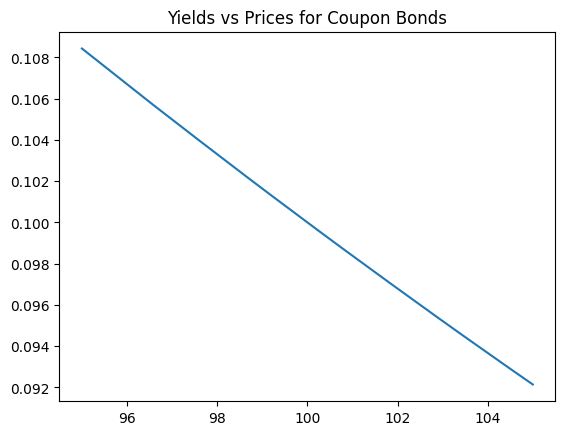

In [20]:
# Changing Bond Prices and Yield
# Term 10, Face Value 1000, Coupon 10%
import numpy as np
import matplotlib.pyplot as plt
prices = np.linspace(95, 105, 20)
yields = np.linspace(500, 1500, 20)
for i, x in enumerate(prices):
    yields[i] = y2m_coupon(x, 0.1, 100, 10)
plt.plot(prices, yields)
plt.title('Yields vs Prices')
plt.show()

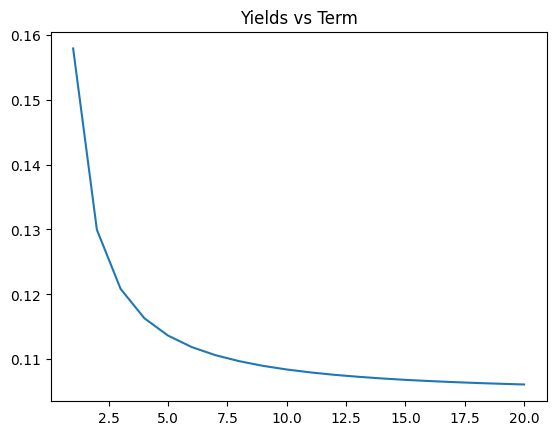

In [35]:
# Changing Term and Yield
# Face Value 100, Coupon 10%, Price 95
terms = np.linspace(1, 20, 20)
yields = np.linspace(500, 1500, 20)
for i, x in enumerate(terms):
    yields[i] = y2m_coupon(95, 0.1, 100, x)
plt.plot(terms, yields)
plt.title('Yields vs Term')
plt.show()

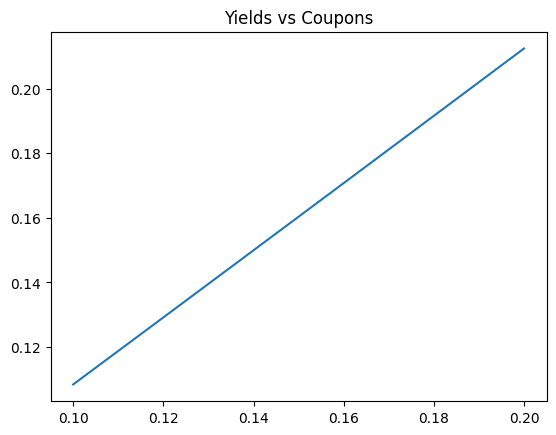

In [36]:
# Changing Coupons and Yield
# Term 10, Face Value 100, Coupon 10%, Price 95
coupons = np.linspace(0.1, 0.2, 20)
yields = np.linspace(500, 1500, 20)
for i, x in enumerate(coupons):
    yields[i] = y2m_coupon(95, x, 100, 10)
plt.plot(coupons, yields)
plt.title('Yields vs Coupons')
plt.show()

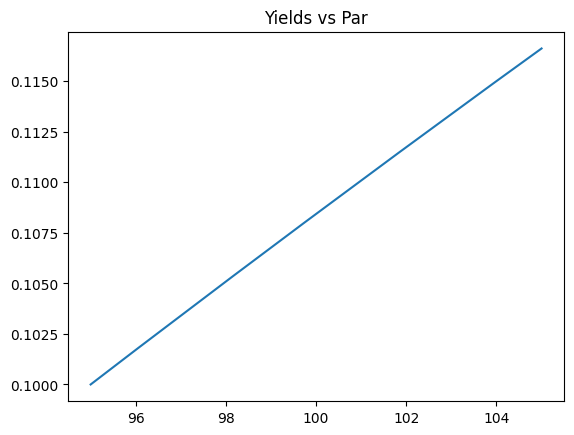

In [37]:
# Changing Coupons and Yield
# Term 10, Coupon 10%, Price 95
pars = np.linspace(95, 105, 20)
yields = np.linspace(500, 1500, 20)
for i, x in enumerate(pars):
    yields[i] = y2m_coupon(95, 0.1, x, 10)
plt.plot(pars, yields)
plt.title('Yields vs Par')
plt.show()

### Cashflows

In [41]:
# Net Present Value Calculator - Price of arbitrary Cashflow
# Given cash flow vector (c), and interest rate (i) we can calculate the present value of the cash-flow

def npv(c, i):
    t = 1
    P = 0
    for n in c:
        P += n / (1+i)**t
        t += 1
    return P

# Two cash flows with equivalent present value
c1 = [100, 100, 100, 100, 100, 100, 100]
c2 = [0, 50, 100, 150, 200, 250]
i = 0.1
npv(c1, i), npv(c2, i)

(486.8418817692931, 484.2085595697804)

In [53]:
# Y2M of arbitrary Cashflow 
# Given cash flow vector and price we can calculate the effective avg interest rate

def y2m(c, P):
    def func(y):
        t = 1
        RHS = 0
        for n in c:
            RHS += n / (1+y[0])**t
            t += 1
        return [RHS - P]
    root = fsolve(func, [0])
    y = root[0]
    return round(y, 4)

# Check with previous result
y2m(c1, 486.8418817692931), y2m(c2, 484.2085595697804)

(0.1, 0.1)